<div style="background-color: white; color: #FF0000; padding: 20px;">
    <h4> Lớp DS102_P13_CNVN - Nhóm 7
     </h4>
    <h4> Các thành viên: </h4>
    - Trần Thanh Hải - MSSV: 22520392 - STT: 38 <br>
    - Nguyễn Minh Trí - MSSV: 22521522 - STT: 76 <br>
    - Cao Trường Vũ - MSSV: 22521686 - STT: 84 <br>
    <h4> Tên đề tài: </h4>
    Xây dựng mô hình dự đoán tỉ lệ chiến thắng của các đội trong giải đấu Vô địch Liên Minh Huyền Thoại Hàn Quốc <br>
    <h4> File gồm có 2 mục lớn: </h4>
    - A. Tiền xử lý dữ liệu (Preprocessing) <br>
    - B. Xây dựng mô hình (Model) <br>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)        # Show all rows
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.width', None)           # Auto-detect display width
pd.set_option('display.max_colwidth', None)    # Show full content in each cell


<div style="background-color: white; color: #FF0000; padding: 20px;">
<h1>A. Tiền xử lý dữ liệu (Preprocessing)</h1>
</div>

## I. Nạp vào và thống kê tổng quan bộ dữ liệu

In [2]:
#Đọc bộ dữ liệu
df = pd.read_csv('../Data/Team_stats_Tournamennts.csv')
df.head(2)

,gameid,datacompleteness,league,year,split,playoffs,date,game,patch,participantid,side,position,teamname,teamid,ban1,ban2,ban3,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,result,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,elders,opp_elders,firstherald,heralds,opp_heralds,void_grubs,opp_void_grubs,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,gpr,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,goldat20,xpat20,csat20,opp_goldat20,opp_xpat20,opp_csat20,golddiffat20,xpdiffat20,csdiffat20,killsat20,assistsat20,deathsat20,opp_killsat20,opp_assistsat20,opp_deathsat20,goldat25,xpat25,csat25,opp_goldat25,opp_xpat25,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
0,LOLTMNT06_13630,complete,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,100,Blue,team,Team BDS,oe:team:7338408a0fe0217451d2c9a567db999,Draven,Bel'Veth,LeBlanc,Jax,Poppy,Kalista,Nocturne,Akali,Pyke,Renekton,1749,0,10,14,11,0.0,0.0,0.0,0.0,1.0,0.3431,0.8233,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,1.0,1.0,3.0,9.0,1.0,1.0,8.0,5.0,0.0,2.0,35171,1206.5523,3303.8765,2168.5763,116,3.9794,54,1.8525,31,273,9.3654,51656,32438,1112.7959,50075,-0.010825,1.05,793.0,212,34.4768,17959.0,18342.0,320.0,17077.0,18109.0,323.0,882.0,233.0,-3.0,5.0,5.0,4.0,4.0,6.0,5.0,27653.0,28686.0,509.0,25924.0,29282.0,514.0,1729.0,-596.0,-5.0,6.0,7.0,5.0,5.0,8.0,6.0,36502.0,40338.0,724.0,34086.0,40490.0,717.0,2416.0,-152.0,7.0,6.0,7.0,5.0,5.0,8.0,6.0,45581.0,53080.0,904.0,44394.0,55632.0,899.0,1187.0,-2552.0,5.0,9.0,10.0,7.0,7.0,12.0,9.0
1,LOLTMNT06_13630,complete,LEC,2024,Winter,0,2024-01-13 16:10:20,1,14.01,200,Red,team,G2 Esports,oe:team:7d6673d3a9d00363c6bebc1a630da6e,Caitlyn,Ashe,Rumble,Blitzcrank,Bard,Neeko,Aphelios,Renata Glasc,Vi,Gwen,1749,1,14,10,26,4.0,0.0,0.0,0.0,0.0,0.4803,0.8233,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,1.0,1.0,0.0,0.0,9.0,3.0,0.0,0.0,5.0,8.0,2.0,0.0,66376,2277.0497,2128.2333,2434.1681,109,3.7393,48,1.6467,32,218,7.4786,56807,37589,1289.5026,50620,0.010825,-1.05,825.0,191,34.8542,17077.0,18109.0,323.0,17959.0,18342.0,320.0,-882.0,-233.0,3.0,4.0,6.0,5.0,5.0,5.0,4.0,25924.0,29282.0,514.0,27653.0,28686.0,509.0,-1729.0,596.0,5.0,5.0,8.0,6.0,6.0,7.0,5.0,34086.0,40490.0,717.0,36502.0,40338.0,724.0,-2416.0,152.0,-7.0,5.0,8.0,6.0,6.0,7.0,5.0,44394.0,55632.0,899.0,45581.0,53080.0,904.0,-1187.0,2552.0,-5.0,7.0,12.0,9.0,9.0,10.0,7.0


In [3]:
df.dtypes

gameid                       object
datacompleteness             object
league                       object
year                          int64
split                        object
playoffs                      int64
date                         object
game                          int64
patch                       float64
participantid                 int64
side                         object
position                     object
teamname                     object
teamid                       object
ban1                         object
ban2                         object
ban3                         object
ban4                         object
ban5                         object
pick1                        object
pick2                        object
pick3                        object
pick4                        object
pick5                        object
gamelength                    int64
result                        int64
kills                         int64
deaths                      

**Vì số lượng đặc trưng là rất lớn (148 cột). Bọn em thống nhất quyết định rằng ở đồ án cuối kỳ này, bọn em sẽ chỉ tập trung vào phân tích các trận đấu thuộc giải đấu LCK.**

In [4]:
#Lọc dữ liệu theo namw
lck_df = df[df['league']=='LCK']
lck_df.head(2)

,gameid,datacompleteness,league,year,split,playoffs,date,game,patch,participantid,side,position,teamname,teamid,ban1,ban2,ban3,ban4,ban5,pick1,pick2,pick3,pick4,pick5,gamelength,result,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,elders,opp_elders,firstherald,heralds,opp_heralds,void_grubs,opp_void_grubs,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,goldspent,gspd,gpr,minionkills,monsterkills,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,goldat20,xpat20,csat20,opp_goldat20,opp_xpat20,opp_csat20,golddiffat20,xpdiffat20,csdiffat20,killsat20,assistsat20,deathsat20,opp_killsat20,opp_assistsat20,opp_deathsat20,goldat25,xpat25,csat25,opp_goldat25,opp_xpat25,opp_csat25,golddiffat25,xpdiffat25,csdiffat25,killsat25,assistsat25,deathsat25,opp_killsat25,opp_assistsat25,opp_deathsat25
38,LOLTMNT02_22165,complete,LCK,2024,Spring,0,2024-01-17 08:20:00,1,14.01,100,Blue,team,DRX,oe:team:101f8589e58c724c1dcd5a9c1555277,K'Sante,Kalista,LeBlanc,Skarner,Sejuani,Lucian,Orianna,Nami,Poppy,Udyr,2507,0,14,14,28,0.0,0.0,0.0,0.0,1.0,0.3351,0.6701,0.0,3.0,4.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,3.0,1.0,3.0,9.0,0.0,1.0,6.0,1.0,0.0,2.0,107963,2583.8771,3484.7387,5798.1013,139,3.3267,71,1.6992,53,357,8.5441,72714,45765,1095.2932,71150,-0.004781,1.1,1136.0,195,31.8548,16277.0,19016.0,360.0,14694.0,18973.0,317.0,1583.0,43.0,43.0,1.0,1.0,0.0,0.0,0.0,1.0,26441.0,30529.0,562.0,22526.0,29121.0,488.0,3915.0,1408.0,74.0,3.0,3.0,1.0,1.0,1.0,3.0,35781.0,43117.0,759.0,30979.0,41284.0,687.0,4802.0,1833.0,72.0,5.0,4.0,2.0,2.0,3.0,5.0,44062.0,53314.0,881.0,42714.0,56073.0,843.0,1348.0,-2759.0,38.0,8.0,13.0,5.0,5.0,10.0,8.0
39,LOLTMNT02_22165,complete,LCK,2024,Spring,0,2024-01-17 08:20:00,1,14.01,200,Red,team,Nongshim RedForce,oe:team:5cd2cd09ec94296f605dd13a2924d6c,Ashe,Varus,Vi,Nocturne,Lee Sin,Milio,Azir,Aphelios,Jax,Gnar,2507,1,14,14,32,1.0,0.0,0.0,0.0,0.0,0.3351,0.6701,1.0,4.0,3.0,4.0,3.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,9.0,3.0,1.0,0.0,1.0,6.0,2.0,0.0,119941,2870.5465,3444.5313,3839.4974,154,3.6857,68,1.6274,69,370,8.8552,78964,52015,1244.8744,71491,0.004781,-1.1,1124.0,260,33.1233,14694.0,18973.0,317.0,16277.0,19016.0,360.0,-1583.0,-43.0,-43.0,0.0,0.0,1.0,1.0,1.0,0.0,22526.0,29121.0,488.0,26441.0,30529.0,562.0,-3915.0,-1408.0,-74.0,1.0,1.0,3.0,3.0,3.0,1.0,30979.0,41284.0,687.0,35781.0,43117.0,759.0,-4802.0,-1833.0,-72.0,2.0,3.0,5.0,5.0,4.0,2.0,42714.0,56073.0,843.0,44062.0,53314.0,881.0,-1348.0,2759.0,-38.0,5.0,10.0,8.0,8.0,13.0,5.0


In [5]:
# lck_df.to_csv('../Data/LCK_Tournament.csv')

lck_df = pd.read_csv('../Data/LCK_Tournament.csv')

### I.1 Kiểm tra dữ liệu khuyết

In [6]:
# Kiểm tra tổng số giá trị khuyết trong từng cột
missing_values = lck_df.isnull().sum()

# Hiển thị các cột có giá trị khuyết (nếu có)
missing_columns = missing_values[missing_values > 0]

if len(missing_columns) > 0:
    print("Các cột có giá trị khuyết:")
    print(missing_columns)
    
    # Tính phần trăm giá trị khuyết
    missing_percentage = (missing_columns / len(lck_df)) * 100
    print("\nPhần trăm giá trị khuyết:")
    print(missing_percentage)
else:
    print("Không có giá trị khuyết trong dataset")

# Xuất ra dòng dữ liệu có chứa giá trị khuyết đó (chỉ xuất các thông tin định danh như gameid, ngày thi đấu, tên đội)
# Tìm kiếm các dòng có chứa giá trị khuyết
rows_with_missing_values = lck_df[lck_df.isnull().any(axis=1)]

# Xuất ra các thông tin định danh của các dòng có chứa giá trị khuyết
print(rows_with_missing_values[['gameid', 'date', 'teamname']])
lck_df.to_csv("../Data/LCK_Tournament.csv")

Các cột có giá trị khuyết:
ban5    1
dtype: int64

Phần trăm giá trị khuyết:
ban5    0.103734
dtype: float64
               gameid                 date   teamname
941  LOLTMNT03_145472  2024-09-01 07:11:01  Dplus KIA


**Nhận xét:** 
- Bộ dữ liệu về các ván đấu ghi nhận ở giải đáu LCK chỉ bị khuyết ở 1 ô dữ liệu duy nhất là 1 lượt ban trong 1 ván đấu. 
- Chúng em đã tiến hành kiểm chứng thực tế thì biết được ghi nhận trên là hoàn toàn chính xác, vì thật sự đội đã bỏ qua lượt ban ấy và không cấm tướng.

### I.2 Tổng quan bộ dữ liệu

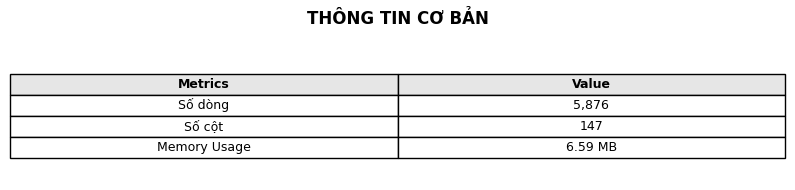

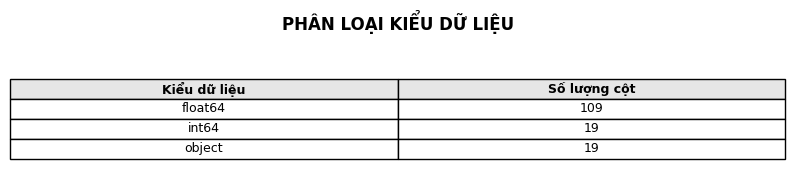

C:\Users\TRIS\AppData\Local\Temp\ipykernel_35296\2431885799.py:62: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


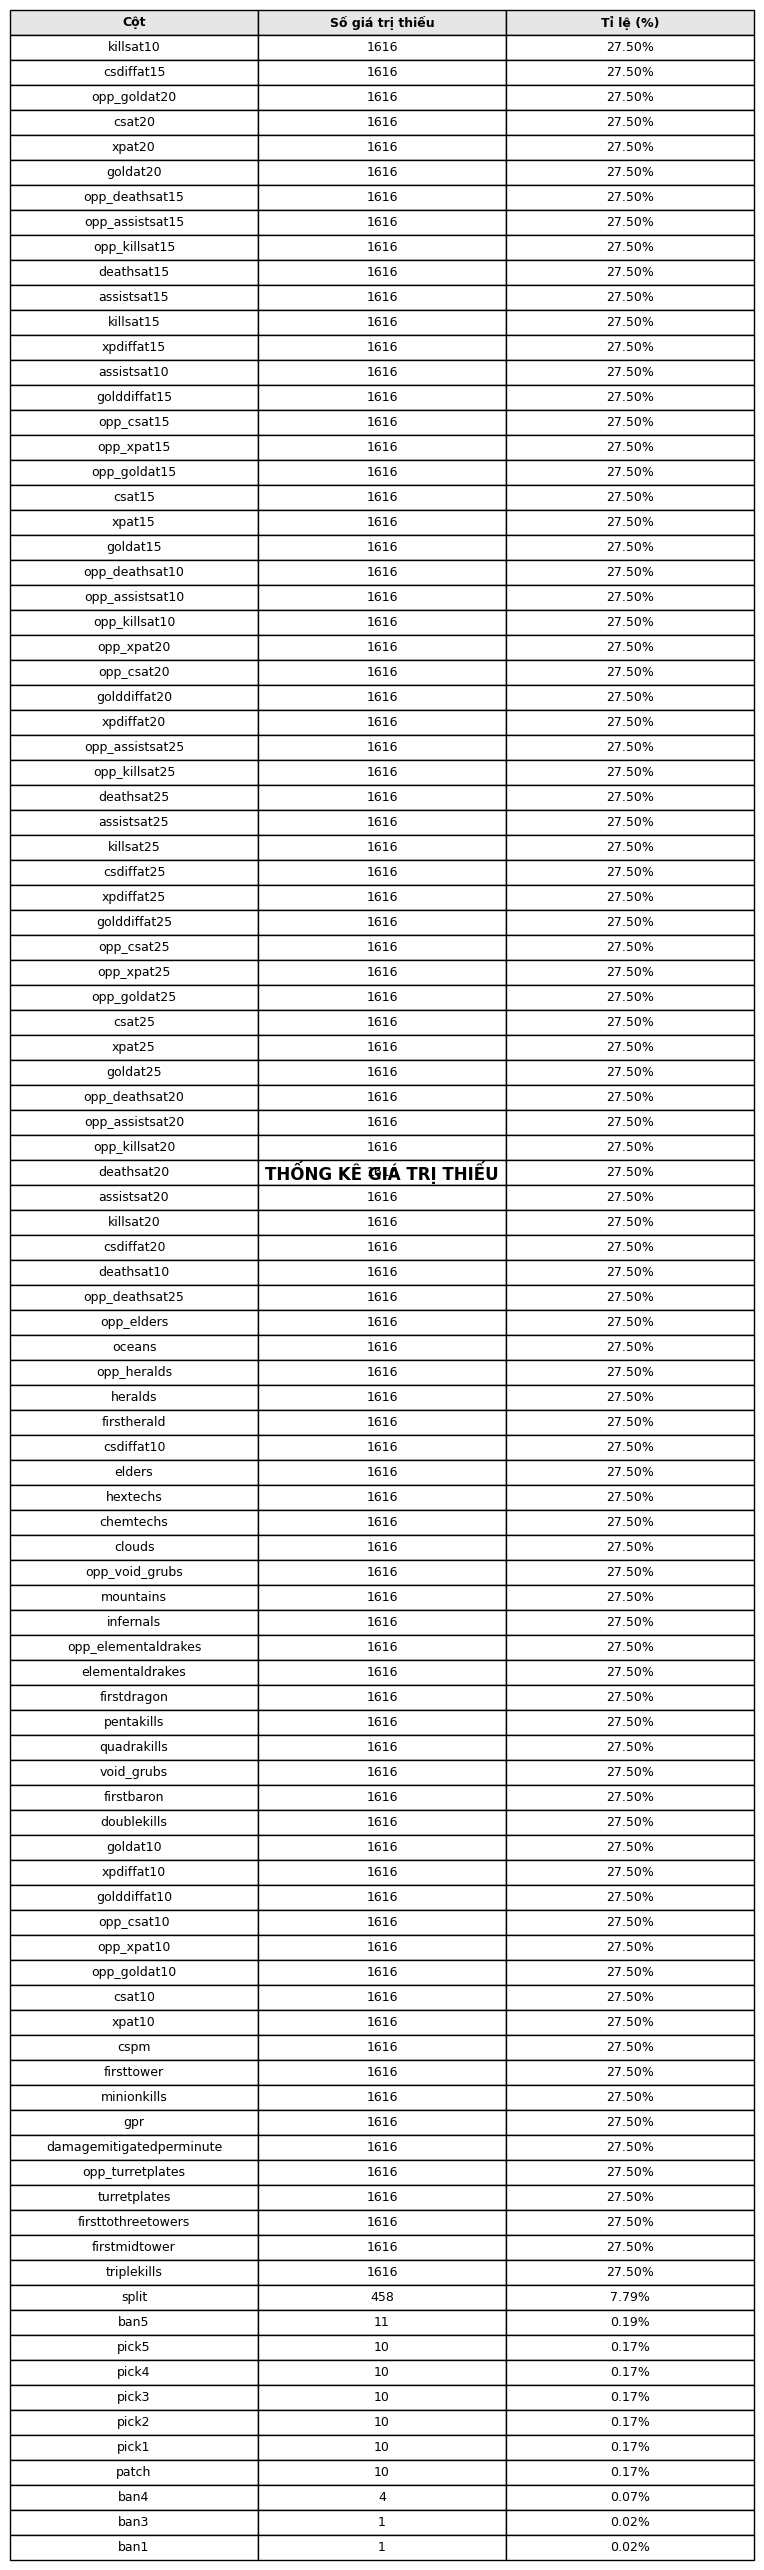

In [62]:
# Import các thư viện cần thiết
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import pandas as pd

def analyze_dataset(df):
    # 1. Thông tin cơ bản
    basic_info = PrettyTable()
    basic_info.title = "THÔNG TIN CƠ BẢN"
    basic_info.field_names = ["Metrics", "Value"]
    basic_info.add_row(["Số dòng", f"{df.shape[0]:,}"])
    basic_info.add_row(["Số cột", f"{df.shape[1]:,}"])
    basic_info.add_row(["Memory Usage", f"{df.memory_usage().sum() / 1024**2:.2f} MB"])
    
    # 2. Phân loại kiểu dữ liệu
    dtype_counts = df.dtypes.value_counts()
    dtype_info = PrettyTable()
    dtype_info.title = "PHÂN LOẠI KIỂU DỮ LIỆU"
    dtype_info.field_names = ["Kiểu dữ liệu", "Số lượng cột"]
    for dtype, count in dtype_counts.items():
        dtype_info.add_row([dtype, count])
    
    # 3. Thống kê giá trị thiếu
    missing_info = PrettyTable()
    missing_info.title = "THỐNG KÊ GIÁ TRỊ THIẾU"
    missing_info.field_names = ["Cột", "Số giá trị thiếu", "Tỉ lệ (%)"]
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
    for col, count in missing_data.items():
        percentage = (count / len(df)) * 100
        missing_info.add_row([col, count, f"{percentage:.2f}%"])

    # Hàm vẽ bảng
    def plot_table(data, title):
        # Tính toán kích thước figure dựa trên số dòng
        row_height = 0.5
        
        fig, ax = plt.subplots(figsize=(8,2))
        ax.axis('tight')
        ax.axis('off')
        
        # Tạo bảng
        table = ax.table(
            cellText=data._rows,
            colLabels=data.field_names,
            cellLoc='center',
            loc='center',
            colColours=['#e6e6e6']*len(data.field_names)
        )
        
        # Định dạng bảng
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1.2, 1.5)
        
        # Định dạng header
        for j, key in enumerate(data.field_names):
            table[0, j].set_text_props(weight='bold')
        
        # Thêm tiêu đề
        plt.title(title, pad=20, fontsize=12, fontweight='bold')
        plt.tight_layout()
        
        return fig

    # Vẽ và lưu các bảng
    tables_data = [
        (basic_info, "THÔNG TIN CƠ BẢN"),
        (dtype_info, "PHÂN LOẠI KIỂU DỮ LIỆU"),
        (missing_info, "THỐNG KÊ GIÁ TRỊ THIẾU")
    ]
    
    figs = []
    for table, title in tables_data:
        fig = plot_table(table, title)
        figs.append(fig)
        plt.figure(fig.number)
        plt.show()
        
    # Lưu các bảng thành ảnh
    for i, fig in enumerate(figs):
        fig.savefig(f'../Data/table_{i+1}.png', 
                    bbox_inches='tight', 
                    dpi=300,
                    facecolor='white')
    
    # Xuất ra Excel
    def table_to_dataframe(table):
        return pd.DataFrame(table._rows, columns=table.field_names)

    with pd.ExcelWriter("../Data/data_analysis.xlsx") as writer:
        table_to_dataframe(basic_info).to_excel(
            writer, 
            sheet_name="Thông tin cơ bản",
            index=False
        )
        
        table_to_dataframe(dtype_info).to_excel(
            writer, 
            sheet_name="Phân loại kiểu dữ liệu",
            index=False
        )
        
        table_to_dataframe(missing_info).to_excel(
            writer, 
            sheet_name="Thống kê giá trị thiếu",
            index=False
        )

# Sử dụng hàm
df=pd.read_csv("../Data/All_Tournament.csv")
analyze_dataset(df)

### Vẽ biểu đồ thống kê số trận thắng thua của mỗi đội

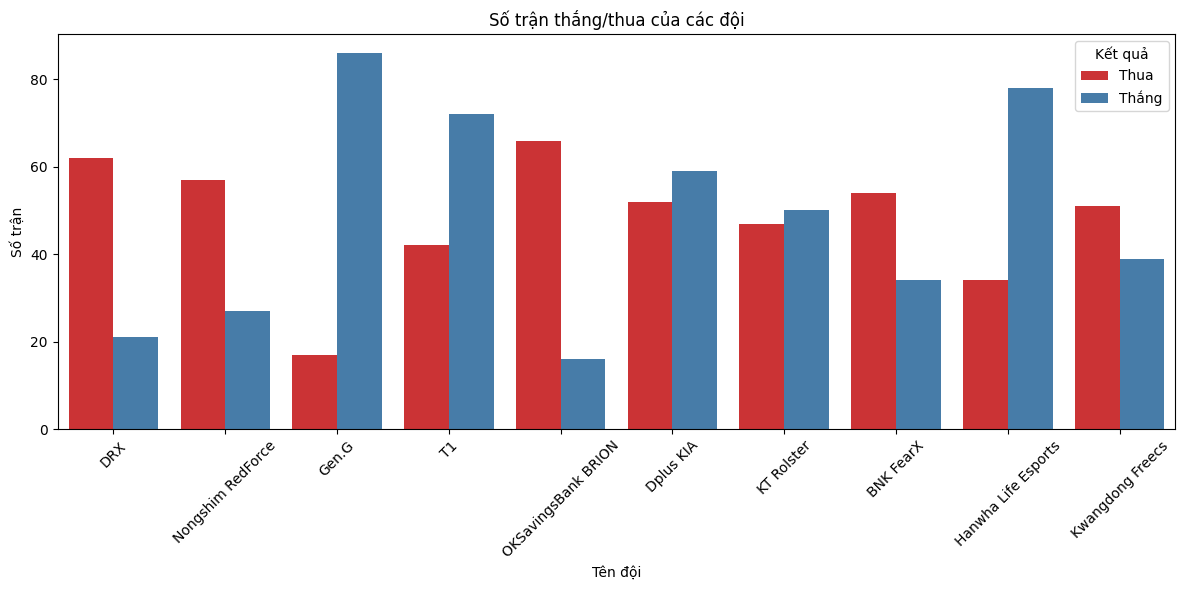

In [45]:

# Đọc dữ liệu
df = pd.read_csv('../Data/Year_Tournament.csv')

# Vẽ biểu đồ count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='teamname', hue='result', palette='Set1')
plt.title('Số trận thắng/thua của các đội')
plt.xlabel('Tên đội')
plt.ylabel('Số trận')
plt.xticks(rotation=45)
plt.legend(title='Kết quả', labels=['Thua', 'Thắng'])
plt.tight_layout()
plt.show()

### I.3 Chia các đặc trưng thành từng nhóm 1 để dễ phân tích

In [46]:
# 1. Thống kê các cột cơ bản về trận đấu
game_basic_cols = ['gameid', 'league', 'year', 'split', 'playoffs', 'date', 'game', 'patch', 'gamelength', 'result']

# 2. Thống kê về đội (Team Identity)
team_identity_cols = ['participantid', 'side', 'position', 'teamname', 'teamid']

# 3. Thống kê về picks & bans
draft_cols = ['ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5']

# 4. Thống kê về KDA và combat
combat_cols = ['kills', 'deaths', 'assists', 'doublekills', 'triplekills', 'quadrakills', 'pentakills', 'firstblood', 'team kpm', 'ckpm']

# 5. Thống kê về objectives
objectives_cols = ['firstdragon', 'dragons', 'opp_dragons', 'elementaldrakes', 'opp_elementaldrakes',
                  'infernals', 'mountains', 'clouds', 'oceans', 'chemtechs', 'hextechs', 'elders',
                  'firstherald', 'heralds', 'firstbaron', 'barons']

# 6. Thống kê về towers và inhibitors
structure_cols = ['firsttower', 'towers', 'opp_towers', 'firstmidtower', 'firsttothreetowers',
                 'turretplates', 'opp_turretplates', 'inhibitors', 'opp_inhibitors']

# 7. Thống kê về damage và vision
damage_vision_cols = ['damagetochampions', 'dpm', 'damagetakenperminute', 'damagemitigatedperminute',
                     'wardsplaced', 'wpm', 'wardskilled', 'wcpm', 'controlwardsbought', 'visionscore', 'vspm']

# 8. Thống kê về gold và resources
economy_cols = ['totalgold', 'earnedgold', 'earned gpm', 'goldspent', 'gspd', 'gpr',
                'minionkills', 'monsterkills', 'cspm']

In [47]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [48]:
df = pd.read_csv('../Data/LCK_Tournament.csv')

## Bỏ bớt các cột

In [49]:
#Drop columns not important
df = df.drop(['year', 'league', 'datacompleteness', 'split', 'playoffs', 'game', 'patch',
              'side', 'position', 'teamid'], axis=1)

## Feature Engineering

In [50]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Combine all multi kills features into one
# Define the list of multi kills features to combine
multi_kills_features = ["doublekills", "triplekills", "quadrakills", "pentakills"]

# Initialize a new column to hold the combined multi kills
df["multikills"] = 0

# Iterate through each multi kills feature and add its value to the combined column
for feature in multi_kills_features:
    df["multikills"] += df[feature]

# Drop the individual multi kills features as they are now combined
df = df.drop(multi_kills_features, axis=1)


In [51]:
def calculate_team_champion_stats(data):
    """Calculate overall champion statistics for each team regardless of pick order"""
    team_champ_stats = {}
    
    # Get all pick columns
    pick_cols = [f"pick{i}" for i in range(1, 6)]
    
    # Calculate stats for each team-champion combination
    for team in data["teamname"].unique():
        team_data = data[data["teamname"] == team]
        champion_stats = {}
        
        # Combine all picks to get total champion usage
        for pick_col in pick_cols:
            for champ in team_data[pick_col].unique():
                if champ not in champion_stats:
                    champion_stats[champ] = {"games": 0, "wins": 0}
                
                champ_games = team_data[team_data[pick_col] == champ]
                champion_stats[champ]["games"] += len(champ_games)
                champion_stats[champ]["wins"] += champ_games["result"].sum()
        
        team_champ_stats[team] = champion_stats
    
    return team_champ_stats

# Calculate team-champion statistics
team_champion_stats = calculate_team_champion_stats(df)

# Add statistics columns for each pick
for i in range(1, 6):
    pick_col = f"pick{i}"
    winrate_col = f"winrate_{pick_col}"
    count_col = f"count_{pick_col}"
    
    def get_champ_stats(row):
        team_stats = team_champion_stats.get(row["teamname"], {})
        champ_stats = team_stats.get(row[pick_col], {"games": 0, "wins": 0})
        
        games = champ_stats["games"]
        winrate = champ_stats["wins"] / games if games > 0 else 0
        
        return pd.Series({
            winrate_col: winrate,
            count_col: games
        })
    
    df[[ winrate_col, count_col ]] = df.apply(get_champ_stats, axis=1)

# Display example of processed data
print("\nExample of team-champion statistics:")
print(df[["teamname", 
          "pick1", "winrate_pick1", "count_pick1",
          "pick2", "winrate_pick2", "count_pick2"]].head())

# Save processed data
df.to_csv("../Data/processed_for_prediction.csv", index=False)



Example of team-champion statistics:
            teamname   pick1  winrate_pick1  count_pick1     pick2  \
0                DRX  Lucian       0.222222          9.0   Orianna   
1  Nongshim RedForce   Milio       0.250000          8.0      Azir   
2                DRX  Lucian       0.222222          9.0      Nami   
3  Nongshim RedForce   Milio       0.250000          8.0        Vi   
4              Gen.G   Corki       0.843750         32.0  Aphelios   

   winrate_pick2  count_pick2  
0       0.000000          4.0  
1       0.176471         17.0  
2       0.200000          5.0  
3       0.444444          9.0  
4       0.750000         12.0  


In [52]:
import pandas as pd
df = pd.read_csv('../Data/processed_for_prediction.csv')

<div style="background-color: white; color: #FF0000; padding: 20px;">
<h1>B. Xây dựng mô hình (Model)</h1>
</div>

In [53]:
from predictor_new import DraftBasedPredictor
import joblib

In [54]:
predictor = DraftBasedPredictor("../Data/processed_for_prediction.csv")
predictor.train_model()


Total features: 60
Training features shape: (964, 60)
Features used in training:
- pick1_encoded
- pick2_encoded
- pick3_encoded
- pick4_encoded
- pick5_encoded
- winrate_pick1
- winrate_pick2
- winrate_pick3
- winrate_pick4
- winrate_pick5
- count_pick1
- count_pick2
- count_pick3
- count_pick4
- count_pick5
- kills
- deaths
- assists
- team kpm
- ckpm
- gspd
- gpr
- gamelength
- firstblood
- firstdragon
- dragons
- elementaldrakes
- firstherald
- heralds
- firstbaron
- barons
- firsttower
- firstmidtower
- firsttothreetowers
- turretplates
- earned gpm
- goldat15
- goldat20
- goldat25
- golddiffat15
- golddiffat20
- golddiffat25
- xpdiffat20
- xpdiffat25
- wardsplaced
- visionscore
- wardskilled
- controlwardsbought
- cspm
- minionkills
- monsterkills
- csat15
- csdiffat15
- csat20
- csdiffat20
- csat25
- csdiffat25
- damagetochampions
- damagetakenperminute
- damagemitigatedperminute
=== Initial Model Evaluation ===

Training XGBoost...
XGBoost Accuracy: 0.9793

Classification Repor

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 MLPClassifier(activation='tanh', alpha=0.001, batch_size=32,
                               early_stopping=True,
                               hidden_layer_sizes=(128, 64, 32),
                               learning_rate='adaptive',
                               learning_rate_init=0.01, max_iter=300,
                               random_state=42))])

In [55]:
predictor = joblib.load('../Models/draft_predictor_best_model.joblib')

In [56]:
#Example
result = predictor.predict_match(
    team1_name="T1",
    team1_picks=["Twisted Fate", "Tahm Kench", "Senna", "Lee Sin", "Ahri"],
    team2_name="Gen.G",
    team2_picks=["Lucian", "Nami", "K'Sante", "Sejuani", "Tristana"]
)
    
predictor.print_detailed_prediction(result)


Predicting match: T1 vs Gen.G
Model expects 60 features

Processing features for prediction:

Processing features for prediction:

=== Match Prediction ===

Overall Win Probabilities:
T1: 0.3%
Gen.G: 99.7%

=== Champion Statistics ===

T1 Draft:

Position 1 - Twisted Fate:
  Team Stats (Pick 1) : 0.0% win rate (2 games)
  Team Stats (All Picks)     : 54.5% win rate (11 games)
  Overall Stats (Pick 1) : 0.0% win rate (2 games)
  Overall Stats (All Picks)   : 64.9% win rate (37 games)

Position 2 - Tahm Kench:
  Team Stats (Pick 2) : 100.0% win rate (2 games)
  Team Stats (All Picks)     : 100.0% win rate (8 games)
  Overall Stats (Pick 2) : 66.7% win rate (12 games)
  Overall Stats (All Picks)   : 61.5% win rate (39 games)

Position 3 - Senna:
  Team Stats (Pick 3) : 100.0% win rate (1 games)
  Team Stats (All Picks)     : 77.3% win rate (22 games)
  Overall Stats (Pick 3) : 100.0% win rate (1 games)
  Overall Stats (All Picks)   : 67.0% win rate (88 games)

Position 4 - Lee Sin:
  Tea

c:\Users\TRIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\TRIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
#Save model
joblib.dump(predictor, '../Models/draft_predictor_best_model.joblib')
print("Model saved successfully!")


Model saved successfully!
